## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = merged_data["Mouse ID"].nunique()
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe = merged_data[merged_data["Mouse ID"].isin(duplicate_mice) == False]
clean_dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number_clean_mice = clean_dataframe["Mouse ID"].nunique()
number_clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_mean = clean_dataframe.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
regimen_median = clean_dataframe.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
regimen_var = clean_dataframe.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
regimen_std = clean_dataframe.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
regimen_sem = clean_dataframe.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_stats = pd.DataFrame({
    "Mean": regimen_mean,
    "Median": regimen_median,
    "Variance": regimen_var,
    "Standard Deviation": regimen_std,
    "SEM": regimen_sem
})

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

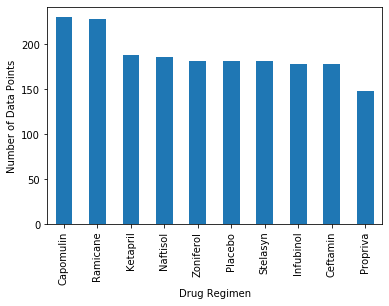

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_drug = clean_dataframe["Drug Regimen"].value_counts()
x_axis = mice_per_drug.index
y_axis = mice_per_drug.values
mice_per_drug.plot(kind="bar")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.savefig("BarPandas.png")
plt.show()

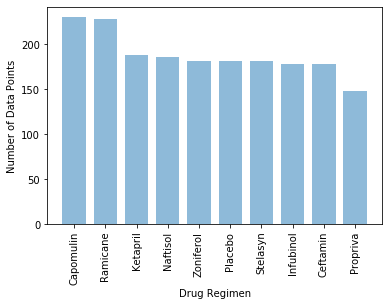

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_per_drug = clean_dataframe["Drug Regimen"].value_counts()
x_axis=np.arange(0,len(y_axis),1)
x_axis2 = mice_per_drug.index
y_axis = mice_per_drug.values
plt.bar(x_axis2, y_axis, alpha=.5, align="center", width=.75)
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.savefig("BarPyplot.png")
plt.show()

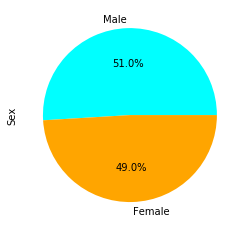

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_dataframe["Sex"].value_counts()
labels = ["Male", "Female"]
colors = ["aqua", "orange"]
gender.plot(kind="pie", colors=colors,
           autopct="%1.1f%%", shadow=False, startangle=0);
plt.savefig("GenderPandas.png")

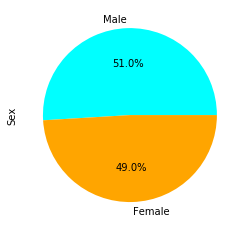

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = clean_dataframe["Sex"].value_counts()
labels = ["Male", "Female"]
colors = ["aqua", "orange"]
plt.ylabel("Sex")
plt.pie(gender, labels=labels, colors=colors, 
       autopct="%1.1f%%", shadow=False, startangle=0);
plt.savefig("GenderPyPlot.png")

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_dataframe.groupby("Mouse ID").max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
data_merge = max_timepoint[["Mouse ID", "Timepoint"]].merge(clean_dataframe, on = ["Mouse ID", "Timepoint"], how = "left")


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
Capomulin = data_merge.loc[data_merge["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
Ramicane = data_merge.loc[data_merge["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
Infubinol = data_merge.loc[data_merge["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
Ceftamin = data_merge.loc[data_merge["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
